# Python Homework 1

<b> Instructions:</b> This Python Homework is due on <b> Sunday, October 9th, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via Gradescope!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* binomial(seed, p,m,n) that returns for given seed a bunch of n Binomial distributed random numbers with the provided success probability p and the number of trial equal to m. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=1/6$,$\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=1/4$ and $\mathbb{P}(\{5\})=\mathbb{P}(\{6\})=1/12$.

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import comb

Here should come your code for the three functions:

In [18]:
def exponentialRV(seed, mean, n):
    '''

    :param seed: seed number
    :param mean: mean
    :param n: number of simulations
    :return:
    '''
    
    #sets the seed
    np.random.seed(seed)

    #draws n samples from a Uniform distribution [0,1]
    u = np.random.random_sample(n)

    #Calculates X
    exponentialSample = -mean * np.log(1-u)

    return exponentialSample

#For Testing
#user_seed = int(input('Input a seed number: '))
#user_mean = int(input('Input a mean: '))
#user_num_rvs = int(input('Input a number of random variables: '))

#exponentialRV(user_seed, user_mean, user_num_rvs)

In [19]:
def binomial(seed, p, m,n):
    '''

    #:param seed: seed number
    #:param p: probability
    #:param m: number of trials
    #:param n: number of simulations

    '''

    #sets the seed
    np.random.seed(seed)

    #draws n samples from a Uniform distribution [0,1]
    u = np.random.random_sample(n)

    #creates list to store cumulative probabilities P(X<=x), starting with 0 for the for loop
    lookup_table = [0]

    #stores cumulative probabilities P(X<=x)
    for i in range(m+1):
        cumulative_prob = lookup_table[i]
        cumulative_prob = math.comb(m, i)*(p**i)*(1-p)**(m-i) + cumulative_prob
        lookup_table.append(cumulative_prob)

    print(lookup_table)


    #removes the zero from the cumulative probabilities for classification
    lookup_table.pop(0)
    lookup_table.pop()
    lookup_table.append(1)

    #Creates empty list to store binomial samples
    binomialSample = list()

    #Locates and adds the index of the interval from the cumulative probability lookup table in which each u lies
    for num in u:
        for lnum in lookup_table:
            if num < lnum:
                binomialSample.append(lookup_table.index(lnum))
                break

    return binomialSample

#For Testing
#user_seed = int(input('Input a seed number: '))
#user_prob = float(input('Input a probability: '))
#user_num_trials = int(input('Input a number of trials: '))
#user_num_simulations = int(input('Input a number of random variables: '))

#binomial(user_seed, user_prob, user_num_trials, user_num_simulations)

In [20]:
def funnyDiceRV(seed, n):
    '''

    :param seed: seed number
    :param n: number of simulations
    :return:
    '''
      
    #sets the seed
    np.random.seed(seed)

    #Creates empty list to store X values
    funnyDiceSample = list()

    #draws n samples from a Uniform distribution [0,1]
    u = np.random.random_sample(n)

    #Locates and adds the index of the interval in which each u lies
    for num in u:
        if num < (1/6):
            funnyDiceSample.append(1)
        elif (1/6) <= num and num < (2/6):
            funnyDiceSample.append(2)
        elif (2/6) <= num and num < (7/12):
            funnyDiceSample.append(3)
        elif (7/12) <= num and num < (10/12):
            funnyDiceSample.append(4)
        elif (10/12) <= num and num < (11/12):
            funnyDiceSample.append(5)
        else:
            funnyDiceSample.append(6)

    return funnyDiceSample

#For Testing
#user_seed = int(input('Input a seed number: '))
#user_num_rvs = int(input('Input a number of random variables: '))

#funnyDiceRV(user_seed, user_num_rvs)

In [21]:
print(exponentialRV(105, 3,5))# You should test all three functions
print(binomial(105, 0.7,20,5))
print(funnyDiceRV(105, 5))

[0.26236509 1.21717374 5.88456477 0.33509781 2.30128578]
[0, 3.4867844010000104e-11, 1.6620338978100047e-09, 3.77308814237101e-08, 5.426947467863113e-07, 5.550253078298772e-06, 4.2940021953591796e-05, 0.00026104700705946774, 0.0012788796042202222, 0.005138161535121415, 0.017144816431258456, 0.04796189733134352, 0.11333146287697848, 0.22772820258183965, 0.3919901877990762, 0.5836291705525187, 0.7624922211223985, 0.892913195496269, 0.9645168677015313, 0.9923627402258, 0.9992020773370238, 0.9999999999999999]
[11, 13, 16, 11, 14]
[1, 3, 5, 1, 3]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

[0, 3.4867844010000104e-11, 1.6620338978100047e-09, 3.77308814237101e-08, 5.426947467863113e-07, 5.550253078298772e-06, 4.2940021953591796e-05, 0.00026104700705946774, 0.0012788796042202222, 0.005138161535121415, 0.017144816431258456, 0.04796189733134352, 0.11333146287697848, 0.22772820258183965, 0.3919901877990762, 0.5836291705525187, 0.7624922211223985, 0.892913195496269, 0.9645168677015313, 0.9923627402258, 0.9992020773370238, 0.9999999999999999]


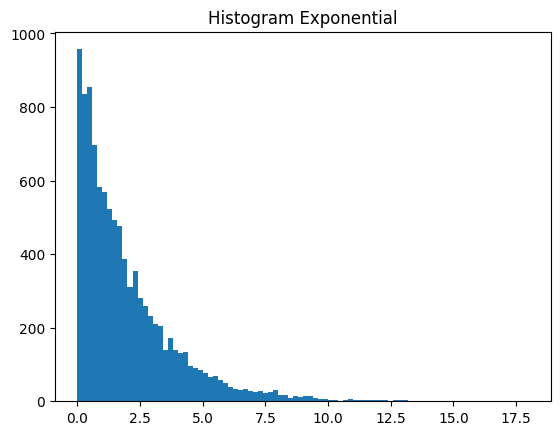

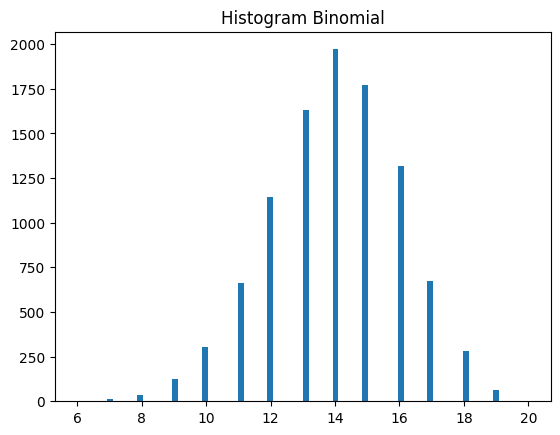

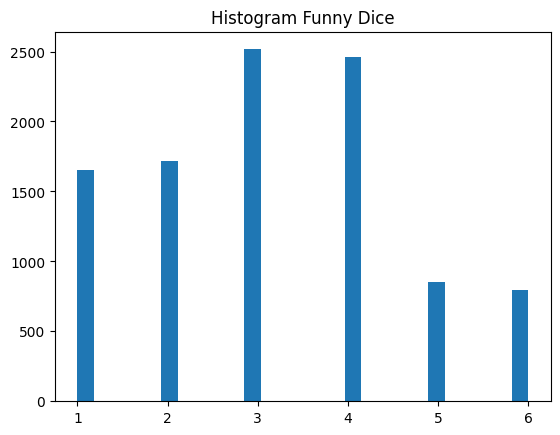

In [22]:
numberSimulations=10000

exponentialSamples=exponentialRV(1, 2,numberSimulations)
binomialSamples=binomial(1, 0.7,20,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)


np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()

plt.hist(binomialSamples, bins='auto')
plt.title("Histogram Binomial")
plt.show()


plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. Is the result of your calculation in line with what you expect? Why?

In [23]:
numberSimulations = 10000

exponentialSamples=exponentialRV(1, 2,numberSimulations)

#Empiricial_Expectation = sum(exponentialSamples)/len(exponentialSamples)

Empiricial_Expectation = np.mean(exponentialSamples)

Empirical_Variance = np.var(exponentialSamples)

print("The Empirical Expectation is {}.".format(Empiricial_Expectation))
print("The Empirical Variance is {}.".format(Empirical_Variance))

The Empirical Expectation is 1.9770938809848277.
The Empirical Variance is 3.848581029324636.


The expected value of an exponentially distributed random variable X with parameter $\beta$ is $E(X) = \beta$. Thus $E(X) = \beta = 2  \approx 1.977$. The variance of X is given by $Var(X) = {\beta}^2 = 2^2 \approx 3.8458$. The result of my calculation is very much in line with what I expected.

Explanation: By the weak law of large numbers, the average of n independent random variables $X_i,i = 1, ...,n,$ all having the same finite mean and variance, is given by $Y_n = 1/n \ \sum_{i=1}^{n} X_i$, then as n approaches infinity, $Y_n$ converges in probability to the common mean, $\mu$, of the random variables $X_i$.